# 5.0 Results
### Trial 2 Findings

In [21]:
# Basic Operations
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Data Set Up

In [50]:
# Raw Dataset with Added Features
raw_data = pd.read_csv("data/training/pose_data_raw_res.csv")
raw_data['label'] = raw_data['pose_name'].str.replace('-lft', '').str.replace('-rgt', '')
labels, uniques = pd.factorize(raw_data['label'])
raw_data['label_encoded'] = labels
Xr = raw_data.iloc[:,2:134]
yr = raw_data['label_encoded'].values
Xr

,landmark_00_x,landmark_00_y,landmark_00_z,landmark_00_v,landmark_01_x,landmark_01_y,landmark_01_z,landmark_01_v,landmark_02_x,landmark_02_y,...,landmark_30_z,landmark_30_v,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_v,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_v
0,0.156662,0.145272,-0.226705,0.999967,0.176508,0.134873,-0.255778,0.999960,0.180816,0.136263,...,0.297465,0.973247,0.885845,0.601937,-0.128135,0.996199,0.274444,0.877034,0.153458,0.988807
1,0.841027,0.155245,-0.178235,0.999999,0.825823,0.140992,-0.144594,0.999998,0.823038,0.141616,...,-0.081044,0.996216,0.725559,0.873818,0.049663,0.999725,0.107791,0.594537,-0.273346,0.999591
2,0.579417,0.602999,-0.569200,0.999869,0.582305,0.620670,-0.547844,0.999827,0.577155,0.623181,...,0.157057,0.988065,0.538199,0.830356,-0.476682,0.990457,0.533117,0.105317,0.013692,0.992697
3,0.416769,0.602737,-0.523792,0.999341,0.396236,0.613743,-0.502519,0.998980,0.388200,0.610559,...,-0.421314,0.674491,0.460221,0.107190,-0.027153,0.968752,0.450880,0.836149,-0.486730,0.767048
4,0.505175,0.451810,-0.427546,0.999929,0.497041,0.466059,-0.436100,0.999883,0.491605,0.470964,...,-0.056964,0.995101,0.137207,0.449030,-0.113019,0.995908,0.929301,0.456119,-0.090710,0.998051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,0.506111,0.534306,-0.154565,0.999970,0.509519,0.520750,-0.135237,0.999945,0.513895,0.519983,...,-0.187706,0.993354,0.924881,0.402281,-0.304024,0.996291,0.101837,0.413196,-0.236651,0.989679
540,0.750999,0.265975,0.050217,1.000000,0.734617,0.252835,0.082880,1.000000,0.731955,0.253481,...,0.004372,0.953845,0.225413,0.414827,0.473995,0.646005,0.272044,0.336316,0.049254,0.949220
541,0.254569,0.253966,0.185102,0.999985,0.276668,0.244936,0.168699,0.999988,0.281481,0.246480,...,0.462144,0.196382,0.693174,0.359902,-0.068871,0.595498,0.770825,0.392072,0.434250,0.176225
542,0.356109,0.269642,-0.166786,0.999335,0.358961,0.250586,-0.201648,0.998349,0.362701,0.249192,...,0.351428,0.970817,0.805866,0.250624,0.061751,0.957399,0.446802,0.869190,0.317473,0.962696


In [53]:
# Augmented Dataset
aug_data = pd.read_csv("data/training/pose_data_aug_res1.csv")
Xa = aug_data.iloc[:,4:]
ya = aug_data['label_encoded'].values
Xa

,landmark_00_x,landmark_00_y,landmark_00_z,landmark_01_x,landmark_01_y,landmark_01_z,landmark_02_x,landmark_02_y,landmark_02_z,landmark_03_x,...,d_elbows,d_knees,d_ankles,a_nose_to_rgt_shoulder,a_nose_to_lft_shoulder,a_mid_hip_to_knees,a_lft_shoulder_to_wrist,a_lft_hip_to_ankle,a_rgt_shoulder_to_wrist,a_rgt_hip_to_ankle
0,0.156662,0.854728,-0.226705,0.176508,0.865127,-0.255778,0.180816,0.863737,-0.256390,0.185507,...,0.0596,0.3454,0.5420,-114.5971,-294.5971,107.1103,-185.5112,-148.0273,174.2554,-176.5460
1,0.193649,0.854728,-0.196057,0.218242,0.865127,-0.221242,0.222591,0.863737,-0.221096,0.227196,...,0.1809,0.3887,0.5748,-129.4264,-309.4264,113.6522,-183.2347,-158.9269,175.4845,-179.2226
2,0.224752,0.854728,-0.159452,0.253345,0.865127,-0.179984,0.257602,0.863737,-0.179085,0.261982,...,0.3086,0.4219,0.5941,-127.1438,-307.1438,118.3787,-181.7597,-170.5934,176.1871,-184.0612
3,0.249026,0.854728,-0.118002,0.280750,0.865127,-0.133256,0.284787,0.863737,-0.131632,0.288807,...,0.4284,0.4434,0.5990,-121.2188,-301.2188,121.5642,-180.5878,-182.3835,176.6125,-195.1985
4,0.265733,0.854728,-0.072966,0.299624,0.865127,-0.082480,0.303318,0.863737,-0.080179,0.306858,...,0.5356,0.4526,0.5893,-112.4241,-292.4241,123.4006,-179.4389,-193.7460,176.8675,-226.3108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19579,0.221597,0.731075,-0.655868,0.241815,0.751349,-0.633527,0.239539,0.752497,-0.631352,0.237434,...,0.5911,0.5505,0.6199,-58.2836,121.7164,154.3500,172.0633,31.9434,-228.7234,-201.5062
19580,0.332121,0.731075,-0.607424,0.348152,0.751349,-0.581912,0.345533,0.752497,-0.580165,0.343013,...,0.5291,0.5494,0.6267,-39.9066,140.0934,154.1885,174.1254,36.1317,-214.9999,-209.2061
19581,0.432553,0.731075,-0.540524,0.443911,0.751349,-0.512615,0.441028,0.752497,-0.511350,0.438171,...,0.4541,0.5319,0.6252,-32.2659,147.7341,153.2878,175.4786,41.6074,-199.8780,-216.7328
19582,0.519843,0.731075,-0.457200,0.526182,0.751349,-0.427743,0.523123,0.752497,-0.426997,0.520014,...,0.3702,0.4986,0.6154,-30.2609,149.7391,151.5254,176.4539,48.8414,-183.9328,-224.2409


In [ ]:
# Readable Labels
poses = aug_data['label'].values

#Scaled
scaler = StandardScaler()
Xr_scaled = scaler.fit_transform(Xr)
Xa_scaled = scaler.fit_transform(Xa)

## 5.1 K-fold Cross Validation Accuracy

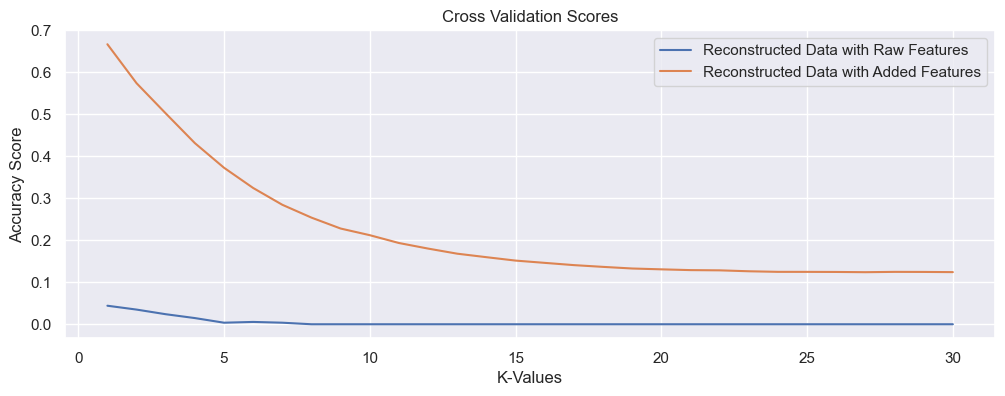

In [54]:
#Scaled
scaler = StandardScaler()
Xr_scaled = scaler.fit_transform(Xr)
Xa_scaled = scaler.fit_transform(Xa)

k_values = [i for i in range(1, 31)]

scores_Xr = []
scores_Xa = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xr_scaled, yr)
    score_Xr = cross_val_score(knn, Xr_scaled, yr, cv=LeaveOneOut(), scoring='accuracy')
    scores_Xr.append(np.mean(score_Xr))
    knn.fit(Xa_scaled, ya)
    score_Xa = cross_val_score(knn, Xa_scaled, ya, cv=8, scoring='accuracy')
    scores_Xa.append(np.mean(score_Xa))

sns.set(rc={'figure.figsize':(12,4)})
sns.lineplot(x = k_values, y = scores_Xr, label='Reconstructed Data with Raw Features')
sns.lineplot(x = k_values, y = scores_Xa, label='Reconstructed Data with Added Features')
plt.title("Cross Validation Scores")
plt.xlabel('K-Values')
plt.ylabel('Accuracy Score')
plt.show()

In [55]:
# Find index of maximum accuracy for reconstructed data 
idx_max_Xr = np.argmax(scores_Xr)
optimal_k_Xr = k_values[idx_max_Xr]
max_accuracy_Xr = scores_Xr[idx_max_Xr]

# Find index of maximum accuracy for reconstructed data with added features
idx_max_Xa = np.argmax(scores_Xa)
optimal_k_Xa = k_values[idx_max_Xa]
max_accuracy_Xa = scores_Xa[idx_max_Xa]

print(f"Optimal K (Xr): {optimal_k_Xr} - Maximum Accuracy: {max_accuracy_Xr:.4f}")
print(f"Optimal K (Xa): {optimal_k_Xa} - Maximum Accuracy: {max_accuracy_Xa:.4f}")

Optimal K (Xr): 1 - Maximum Accuracy: 0.0441
Optimal K (Xa): 1 - Maximum Accuracy: 0.6668


## 5.2 Principal Component Analysis

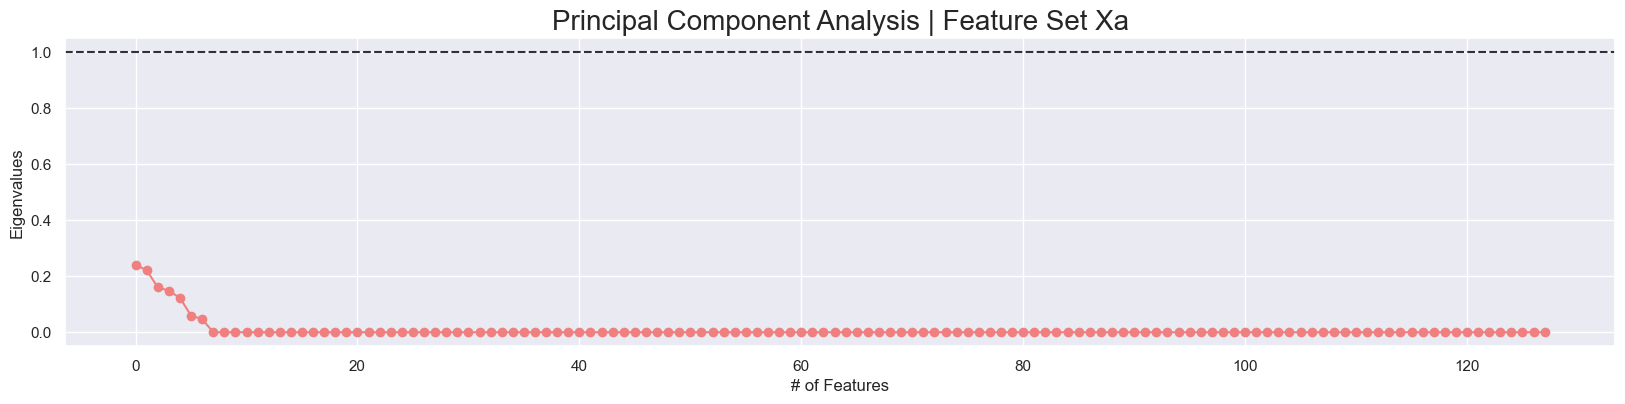

In [56]:
Xa_pca = PCA(n_components=len(Xa.columns))
Xa_pca.fit_transform(Xa)
Xa_var = np.cumsum(np.round(Xa_pca.explained_variance_ratio_,decimals=3)*100)

sns.set(rc={'figure.figsize':(20,4)})
plt.plot(Xa_pca.explained_variance_ratio_, marker='o',label='Feature Set Xa', color='lightcoral')
plt.axhline(y=1, color='black', alpha=0.8, linestyle='--', label='Kaiser Criterion')
plt.xlabel("# of Features")
plt.ylabel("Eigenvalues")
plt.title("Principal Component Analysis | Feature Set Xa", fontsize=20)
plt.grid(True)
plt.show()

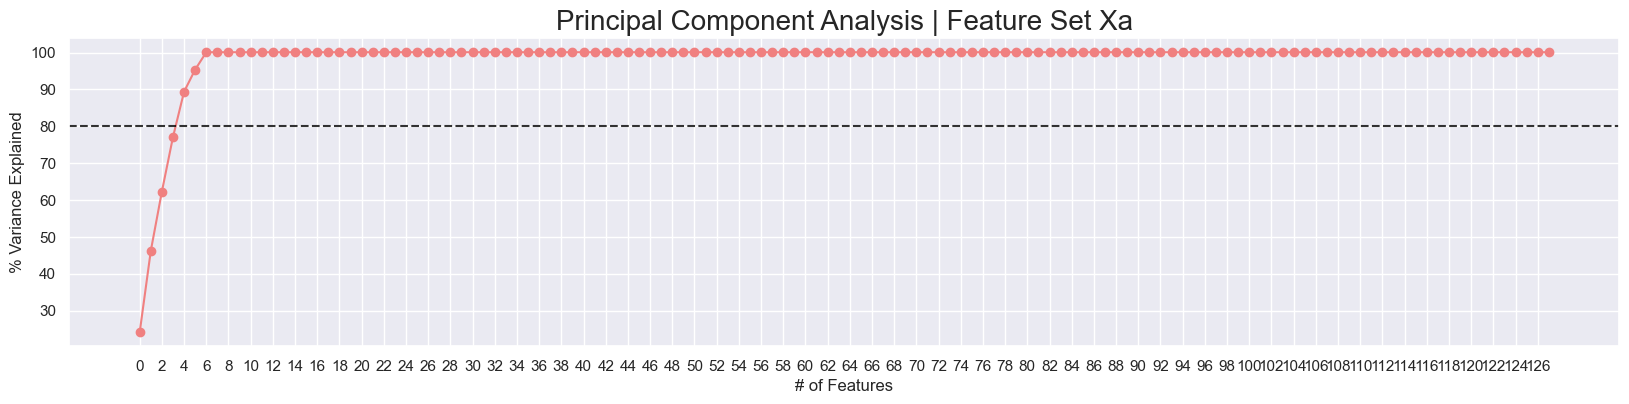

In [57]:
sns.set(rc={'figure.figsize':(20,4)})
plt.plot(Xa_var, marker='o',label='Feature Set Xa', color='lightcoral')
plt.axhline(y=80, color='black', alpha=0.8, linestyle='--', label='80% Variance')
plt.xlabel("# of Features")
plt.ylabel("% Variance Explained")
plt.title("Principal Component Analysis | Feature Set Xa", fontsize=20)
plt.xticks(np.arange(0, len(Xa_var), step=2))
plt.grid(True)
plt.show()

## 5.3 Linear Discriminant Analysis

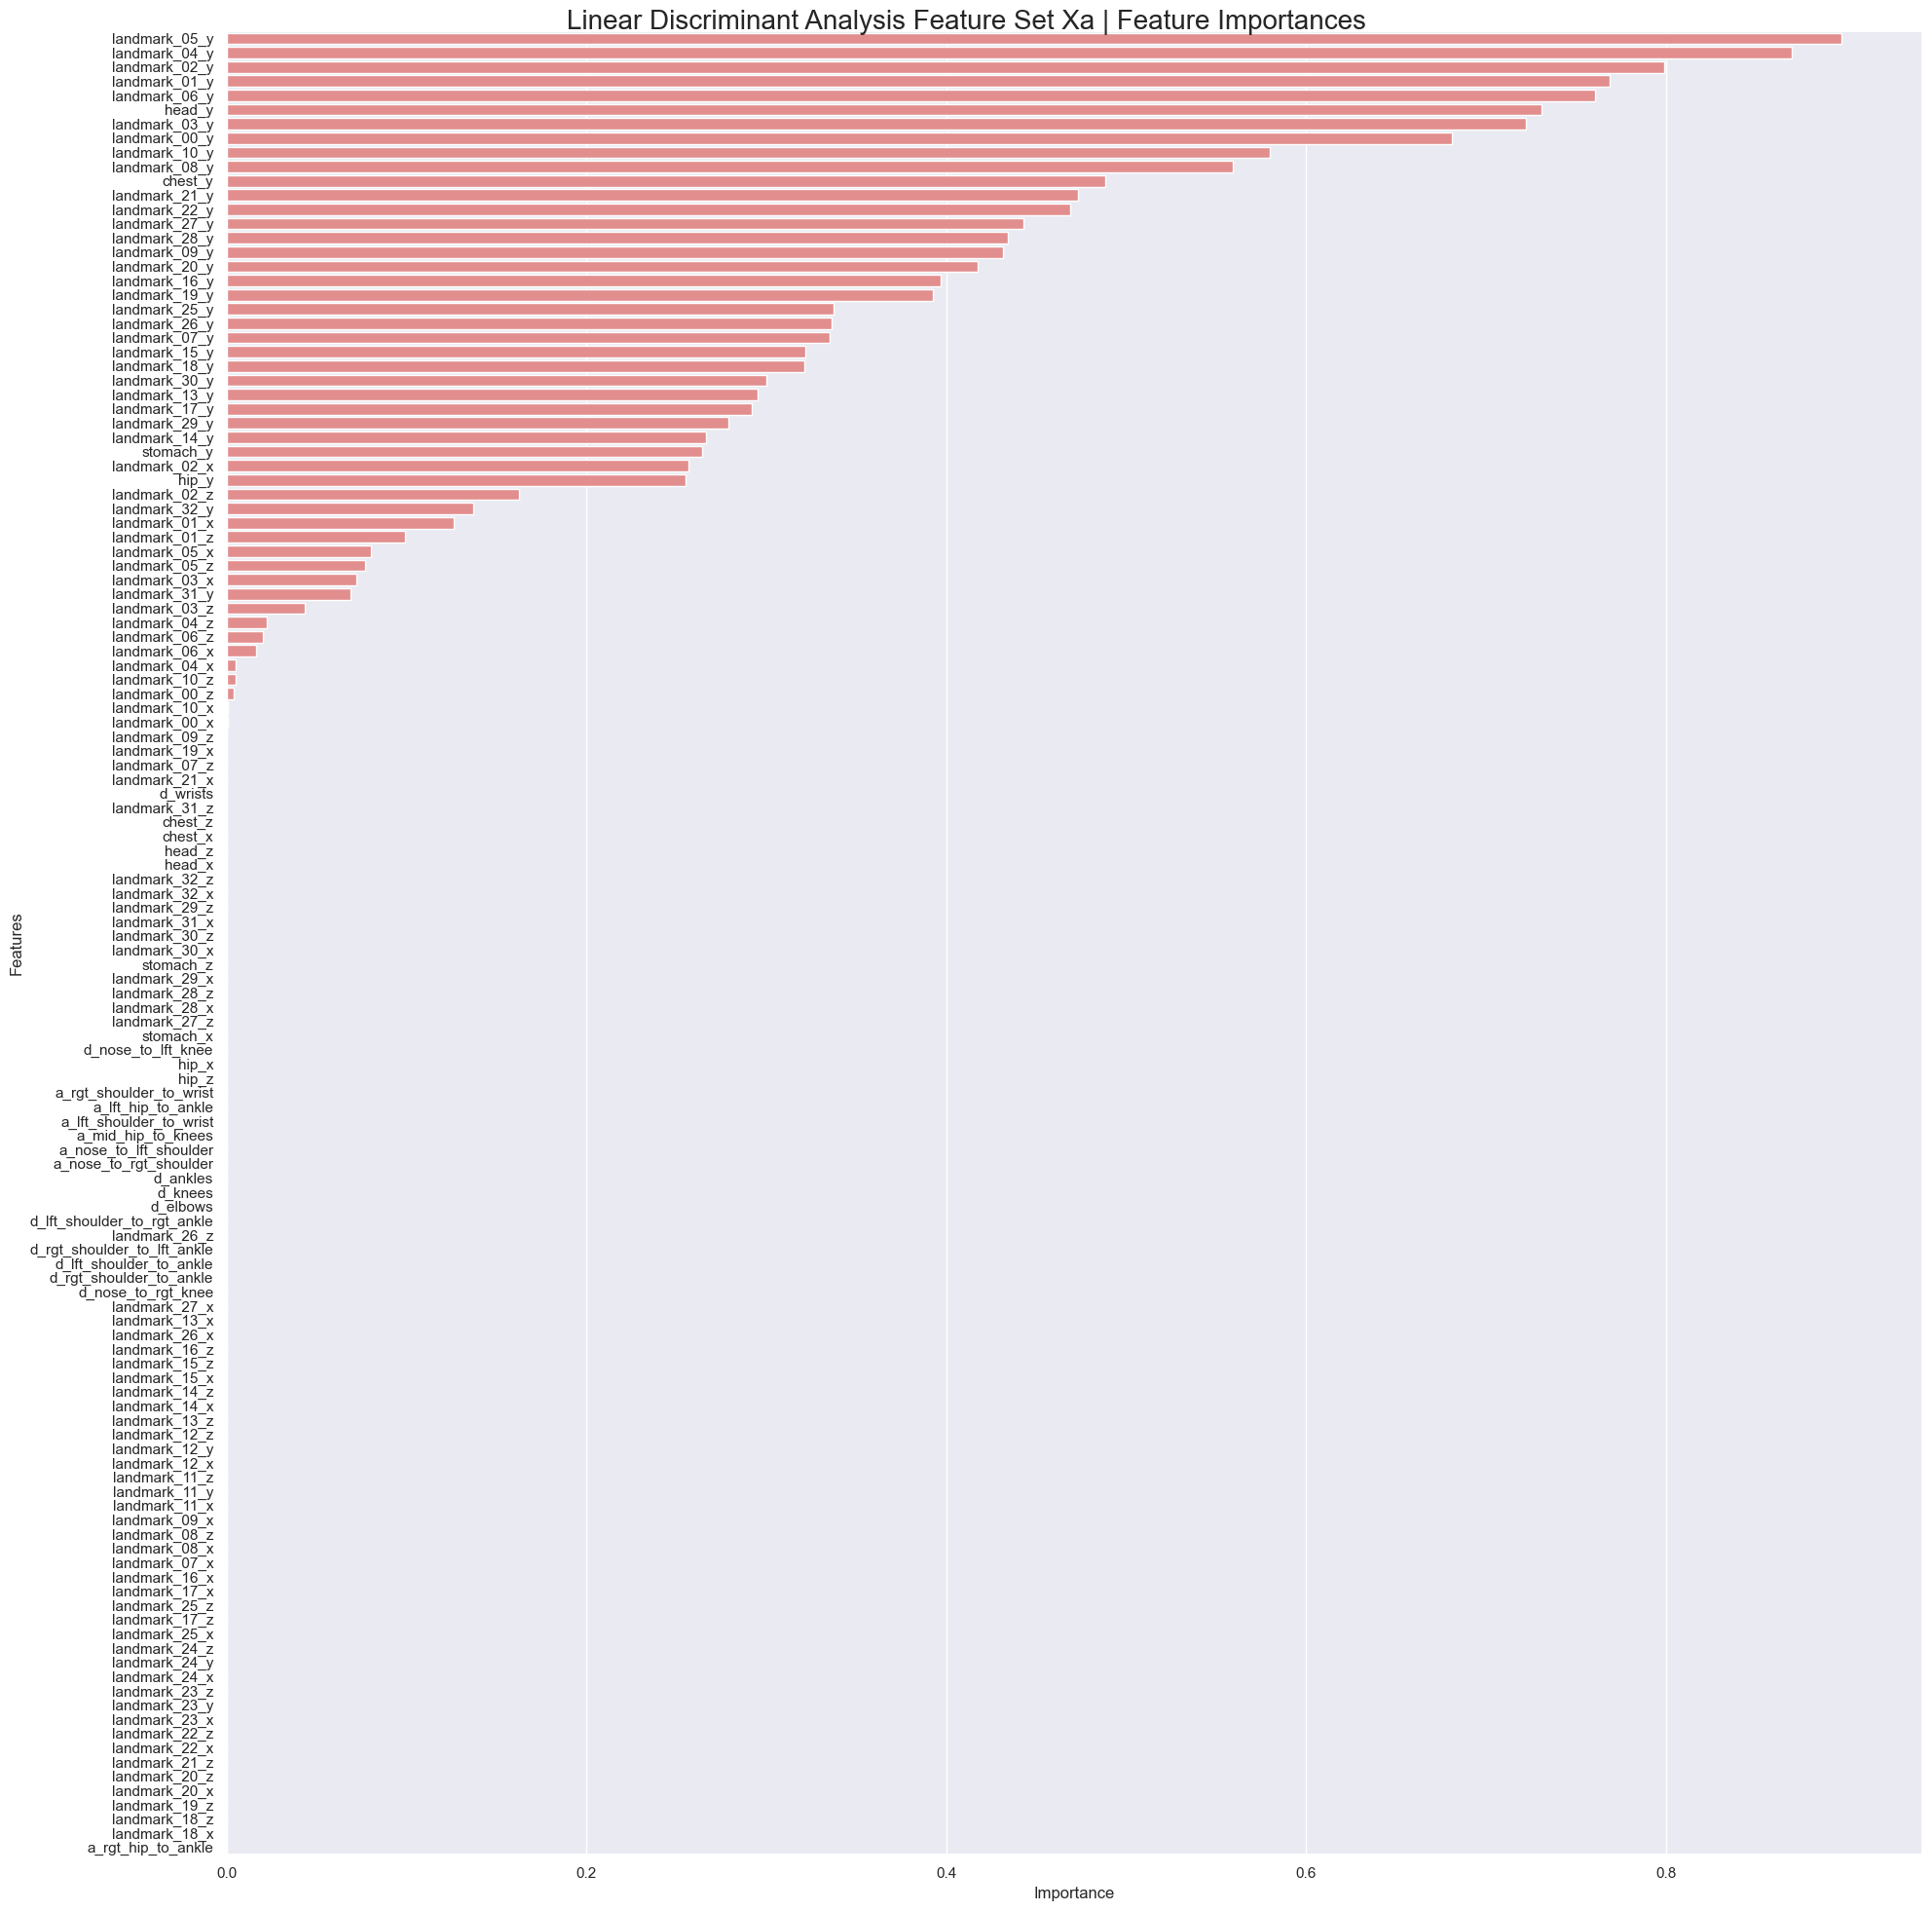

In [61]:
Xa_lda = LinearDiscriminantAnalysis(n_components=len(Xa.columns))
Xa_lda.fit(Xa, ya)
Xa_importances = permutation_importance(Xa_lda, Xa, ya, n_repeats=10)
Xa_features = Xa.columns
Xa_sorted_importances = dict(sorted(zip(Xa_features, Xa_importances.importances_mean), key=lambda item: item[1], reverse=True))
Xa_importances_df = pd.DataFrame(list(Xa_sorted_importances.items()), columns=['feature', 'importance'])
Xa_importances_df = Xa_importances_df.sort_values(by='importance', ascending=False)
sns.set(rc={'figure.figsize':(20,20)})
sns.barplot(x='importance', y='feature', data=Xa_importances_df, color='lightcoral')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.suptitle("Linear Discriminant Analysis Feature Set Xa | Feature Importances", fontsize=20)
plt.tight_layout()
plt.show()

## 5.4 KNN Validation

### Import Test Data

In [73]:
Xt1 = pd.read_csv('data/test/processed/superman/01/pose_data_res1.csv')
Xt1 = Xt1.loc[:, ~Xt1.columns.str.contains('_v')]
Xt2 = pd.read_csv('data/test/processed/superman/02/pose_data_res1.csv')
Xt2 = Xt2.loc[:, ~Xt2.columns.str.contains('_v')]
Xt3 = pd.read_csv('data/test/processed/superman/02/pose_data_res1.csv')
Xt3 = Xt3.loc[:, ~Xt3.columns.str.contains('_v')]

Xt4 = pd.read_csv('data/test/processed/crucifix/01/pose_data_res1.csv')
Xt4 = Xt4.loc[:, ~Xt4.columns.str.contains('_v')]
Xt5 = pd.read_csv('data/test/processed/crucifix/02/pose_data_res1.csv')
Xt5 = Xt5.loc[:, ~Xt5.columns.str.contains('_v')]
Xt6 = pd.read_csv('data/test/processed/crucifix/02/pose_data_res1.csv')
Xt6 = Xt6.loc[:, ~Xt6.columns.str.contains('_v')]

Xt7 = pd.read_csv('data/test/processed/fireman/01/pose_data_res1.csv')
Xt7 = Xt7.loc[:, ~Xt7.columns.str.contains('_v')]
Xt8 = pd.read_csv('data/test/processed/fireman/02/pose_data_res1.csv')
Xt8 = Xt8.loc[:, ~Xt8.columns.str.contains('_v')]
Xt9 = pd.read_csv('data/test/processed/fireman/02/pose_data_res1.csv')
Xt9 = Xt9.loc[:, ~Xt9.columns.str.contains('_v')]

In [74]:
# LDA Reduced Features
Xa_important_features = Xa_importances_df[Xa_importances_df['importance'] > 0.1]['feature'].values
# Manual Features
Xa_manual_features = Xa.columns.values

In [75]:
optimal_k = 1
input_metric = 'cosine'
input_weights = 'distance'

Xa_lda_knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=input_metric, weights=input_weights)
Xa_manual_knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=input_metric, weights=input_weights)

Xa_lda_knn.fit(Xa[Xa_important_features], poses)
Xa_manual_knn.fit(Xa[Xa_manual_features], poses)

KNeighborsClassifier(metric='cosine', n_neighbors=1, weights='distance')

**Test Category: Superman**

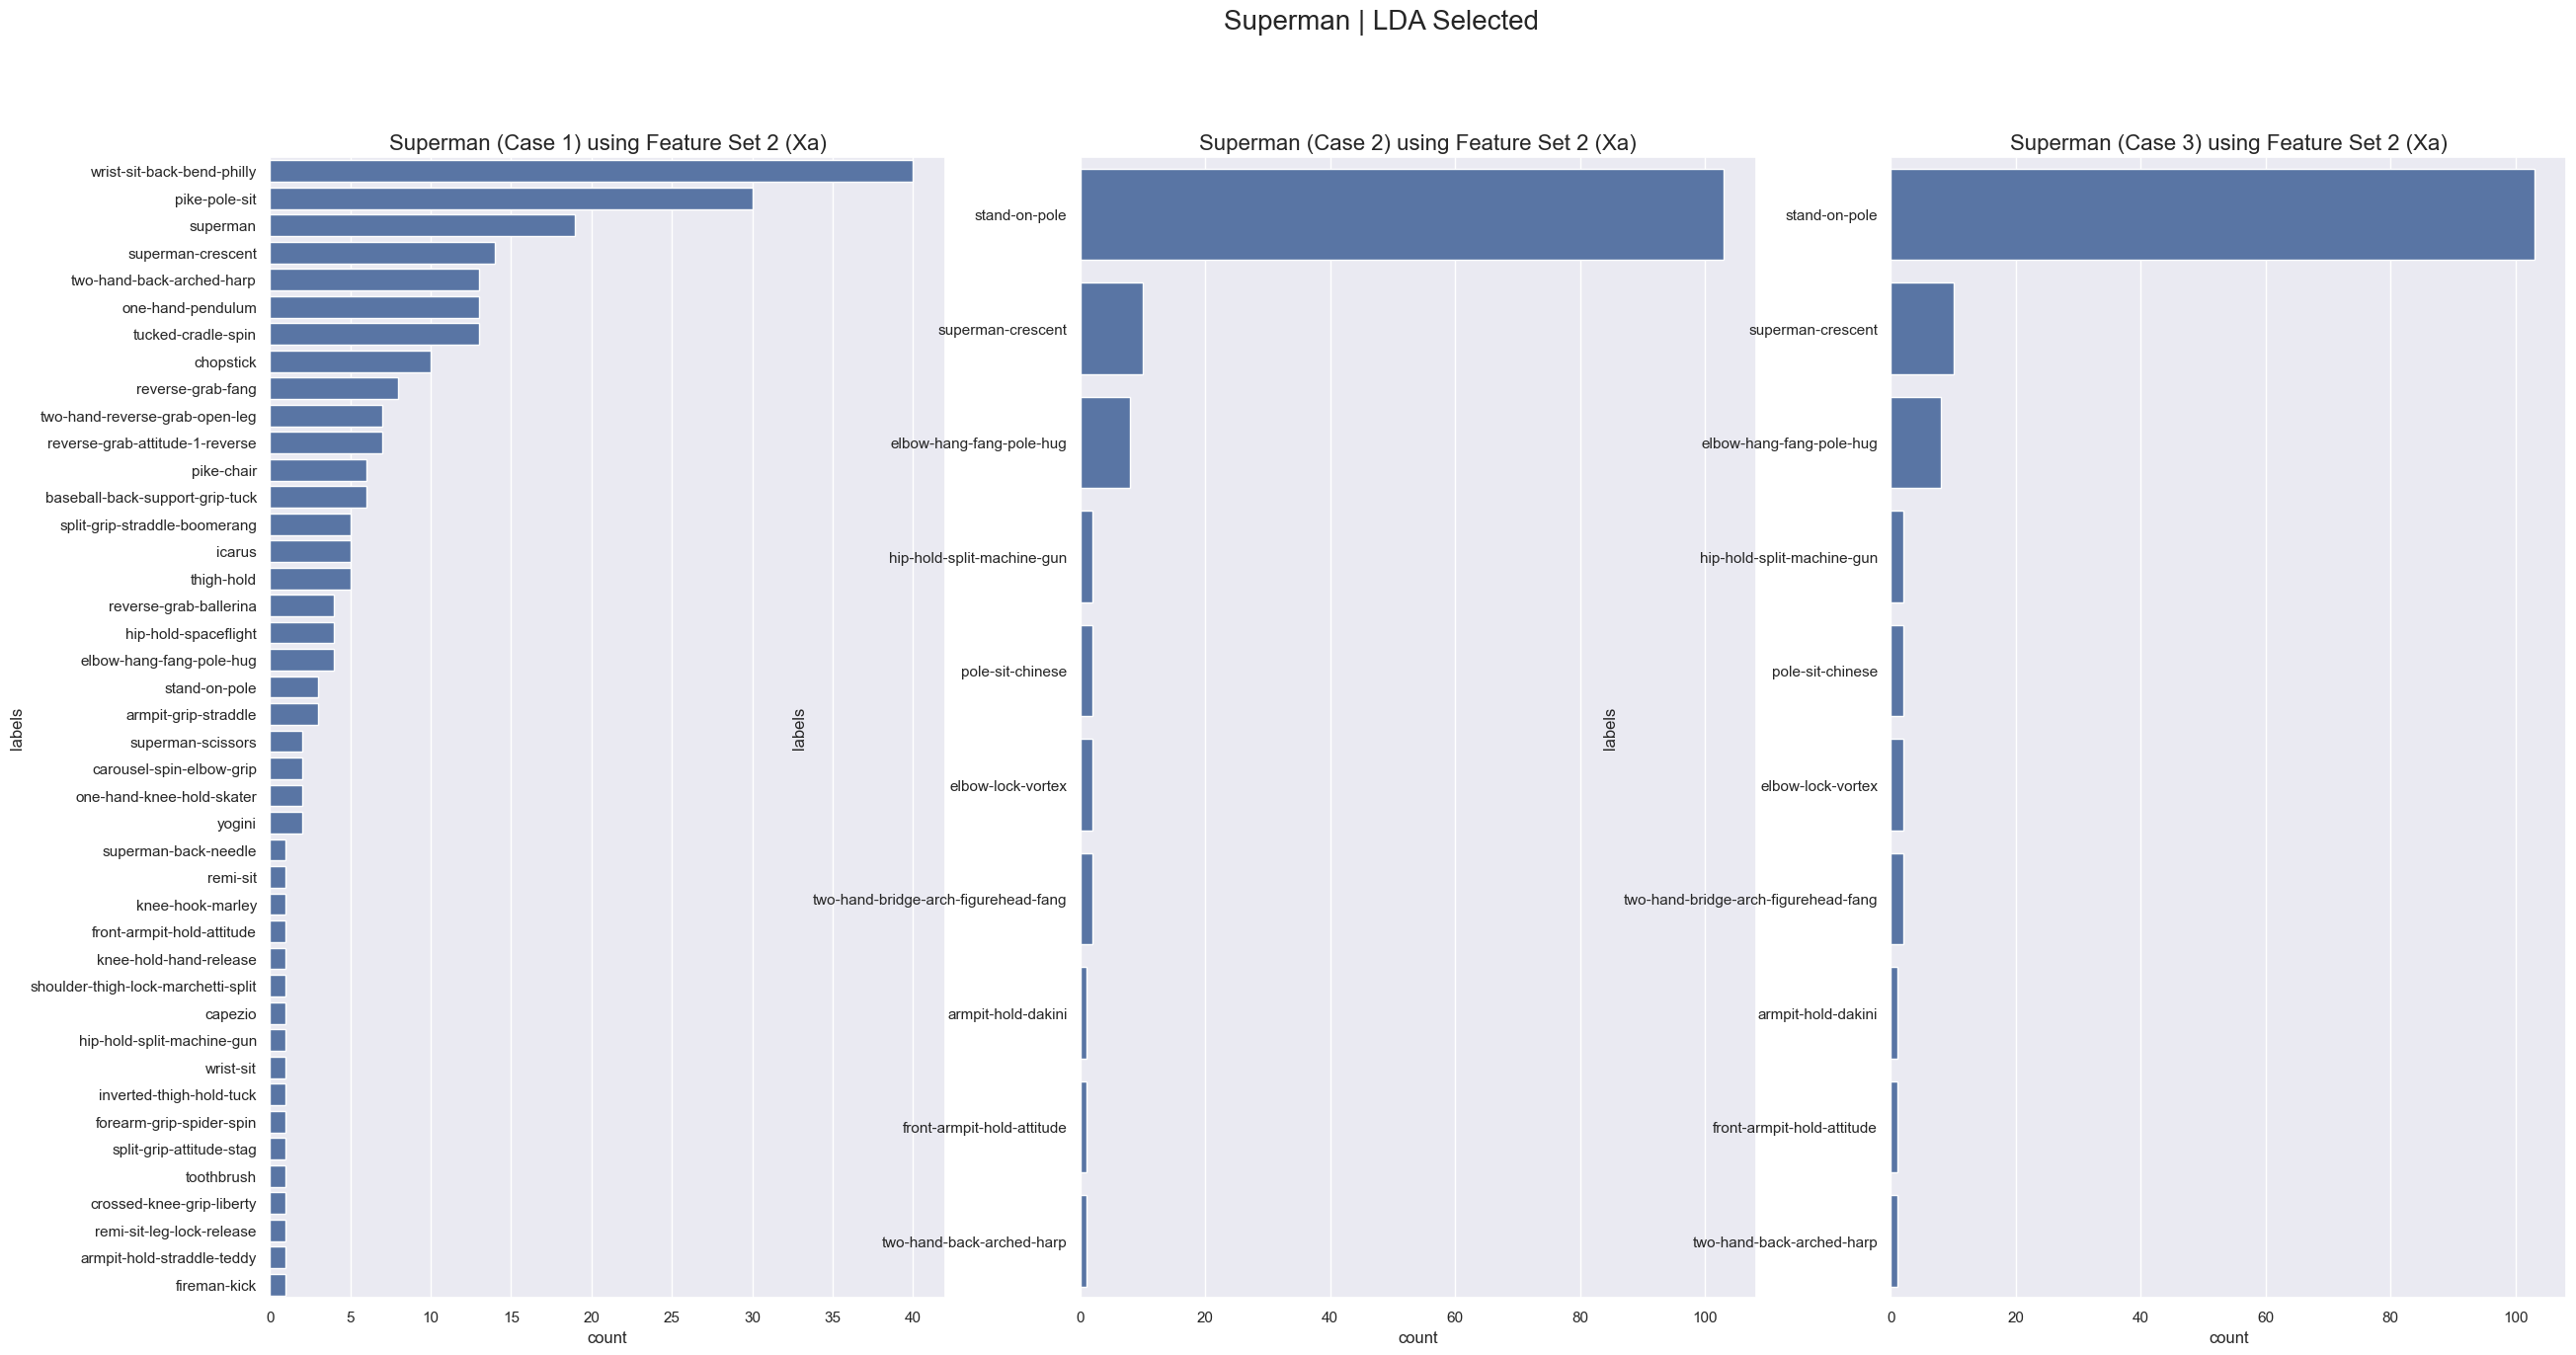

In [76]:
test_category = 'Superman'
feature_selection = 'LDA Selected'

# Test Case: Xt1
Xa_y_pred1 = Xa_lda_knn.predict(Xt1[Xa_important_features])
Xa_y_pred1_df = pd.DataFrame(Xa_y_pred1, columns=['labels'])

# Test Case: Xt2
Xa_y_pred2 = Xa_lda_knn.predict(Xt2[Xa_important_features])
Xa_y_pred2_df = pd.DataFrame(Xa_y_pred2, columns=['labels'])

# Test Case: Xt3
Xa_y_pred3 = Xa_lda_knn.predict(Xt3[Xa_important_features])
Xa_y_pred3_df = pd.DataFrame(Xa_y_pred3, columns=['labels'])

fig, axs = plt.subplots(1, 3, figsize=(30, 15))
fig.suptitle(f'{test_category} | {feature_selection}', fontsize=20)

axs[0].set_title(f'{test_category} (Case 1) using Feature Set 2 (Xa)', fontsize=16)
axs[1].set_title(f'{test_category} (Case 2) using Feature Set 2 (Xa)', fontsize=16)
axs[2].set_title(f'{test_category} (Case 3) using Feature Set 2 (Xa)', fontsize=16)

sns.countplot(data=Xa_y_pred1_df, y='labels', order=Xa_y_pred1_df['labels'].value_counts().index, ax=axs[0])
sns.countplot(data=Xa_y_pred2_df, y='labels', order=Xa_y_pred2_df['labels'].value_counts().index, ax=axs[1])
sns.countplot(data=Xa_y_pred3_df, y='labels', order=Xa_y_pred3_df['labels'].value_counts().index, ax=axs[2])

fig.savefig("trial2_knn_superman_lda.png",dpi=150)

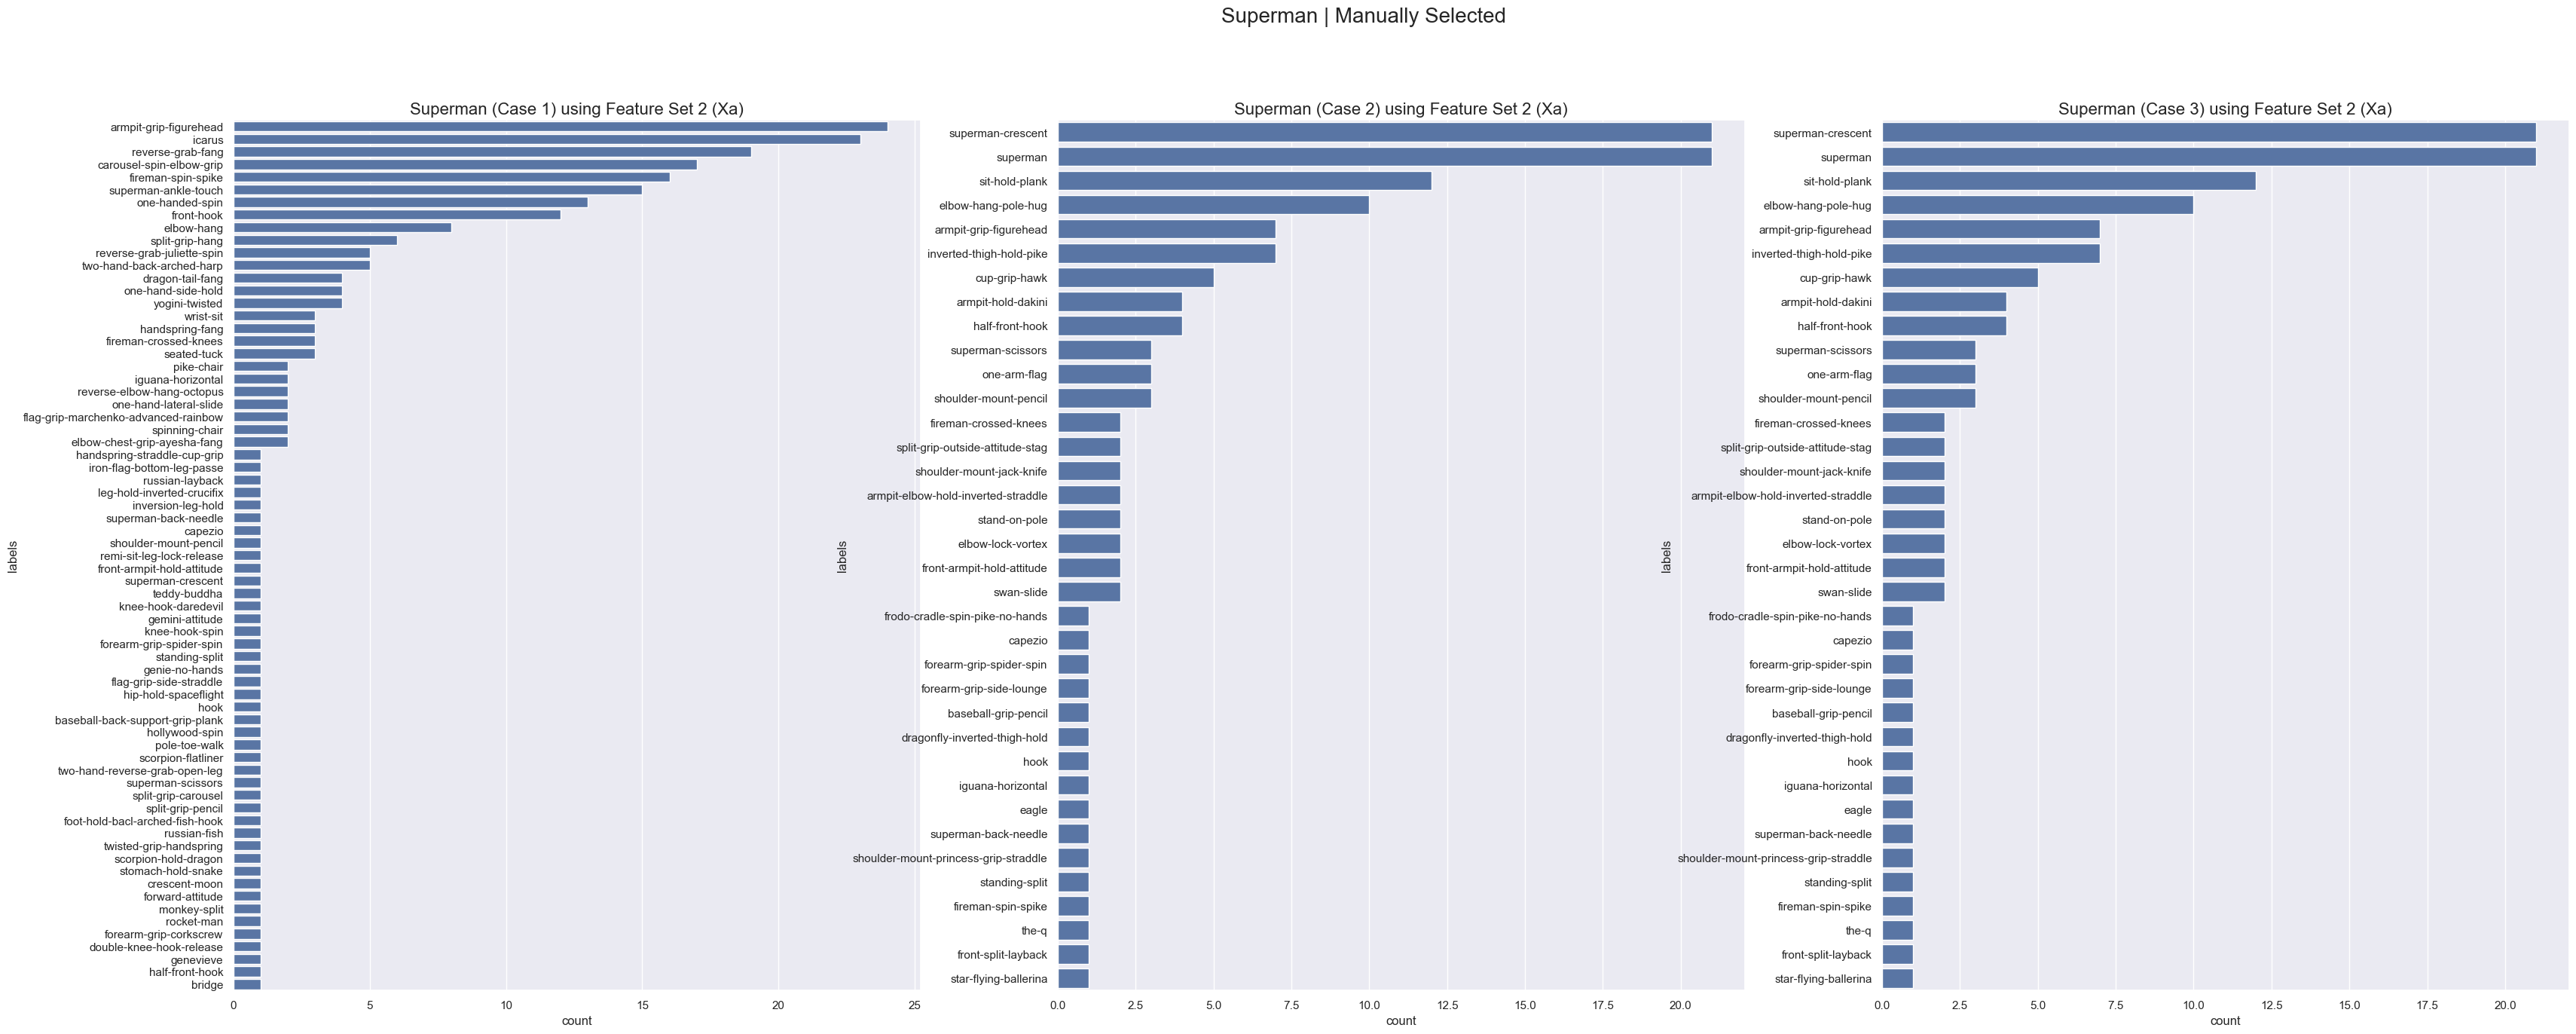

In [77]:
feature_selection = 'Manually Selected'

# Test Case: Xt1
Xa_y_pred1 = Xa_manual_knn.predict(Xt1[Xa_manual_features])
Xa_y_pred1_df = pd.DataFrame(Xa_y_pred1, columns=['labels'])

# Test Case: Xt2
Xa_y_pred2 = Xa_manual_knn.predict(Xt2[Xa_manual_features])
Xa_y_pred2_df = pd.DataFrame(Xa_y_pred2, columns=['labels'])

# Test Case: Xt3
Xa_y_pred3 = Xa_manual_knn.predict(Xt3[Xa_manual_features])
Xa_y_pred3_df = pd.DataFrame(Xa_y_pred3, columns=['labels'])

fig, axs = plt.subplots(1, 3, figsize=(40, 15))
fig.suptitle(f'{test_category} | {feature_selection}', fontsize=20)

axs[0].set_title(f'{test_category} (Case 1) using Feature Set 2 (Xa)', fontsize=16)
axs[1].set_title(f'{test_category} (Case 2) using Feature Set 2 (Xa)', fontsize=16)
axs[2].set_title(f'{test_category} (Case 3) using Feature Set 2 (Xa)', fontsize=16)

sns.countplot(data=Xa_y_pred1_df, y='labels', order=Xa_y_pred1_df['labels'].value_counts().index, ax=axs[0])
sns.countplot(data=Xa_y_pred2_df, y='labels', order=Xa_y_pred2_df['labels'].value_counts().index, ax=axs[1])
sns.countplot(data=Xa_y_pred3_df, y='labels', order=Xa_y_pred3_df['labels'].value_counts().index, ax=axs[2])

plt.savefig("trial2_knn_superman_all.png",dpi=150)

**Test Category: Crucifix**

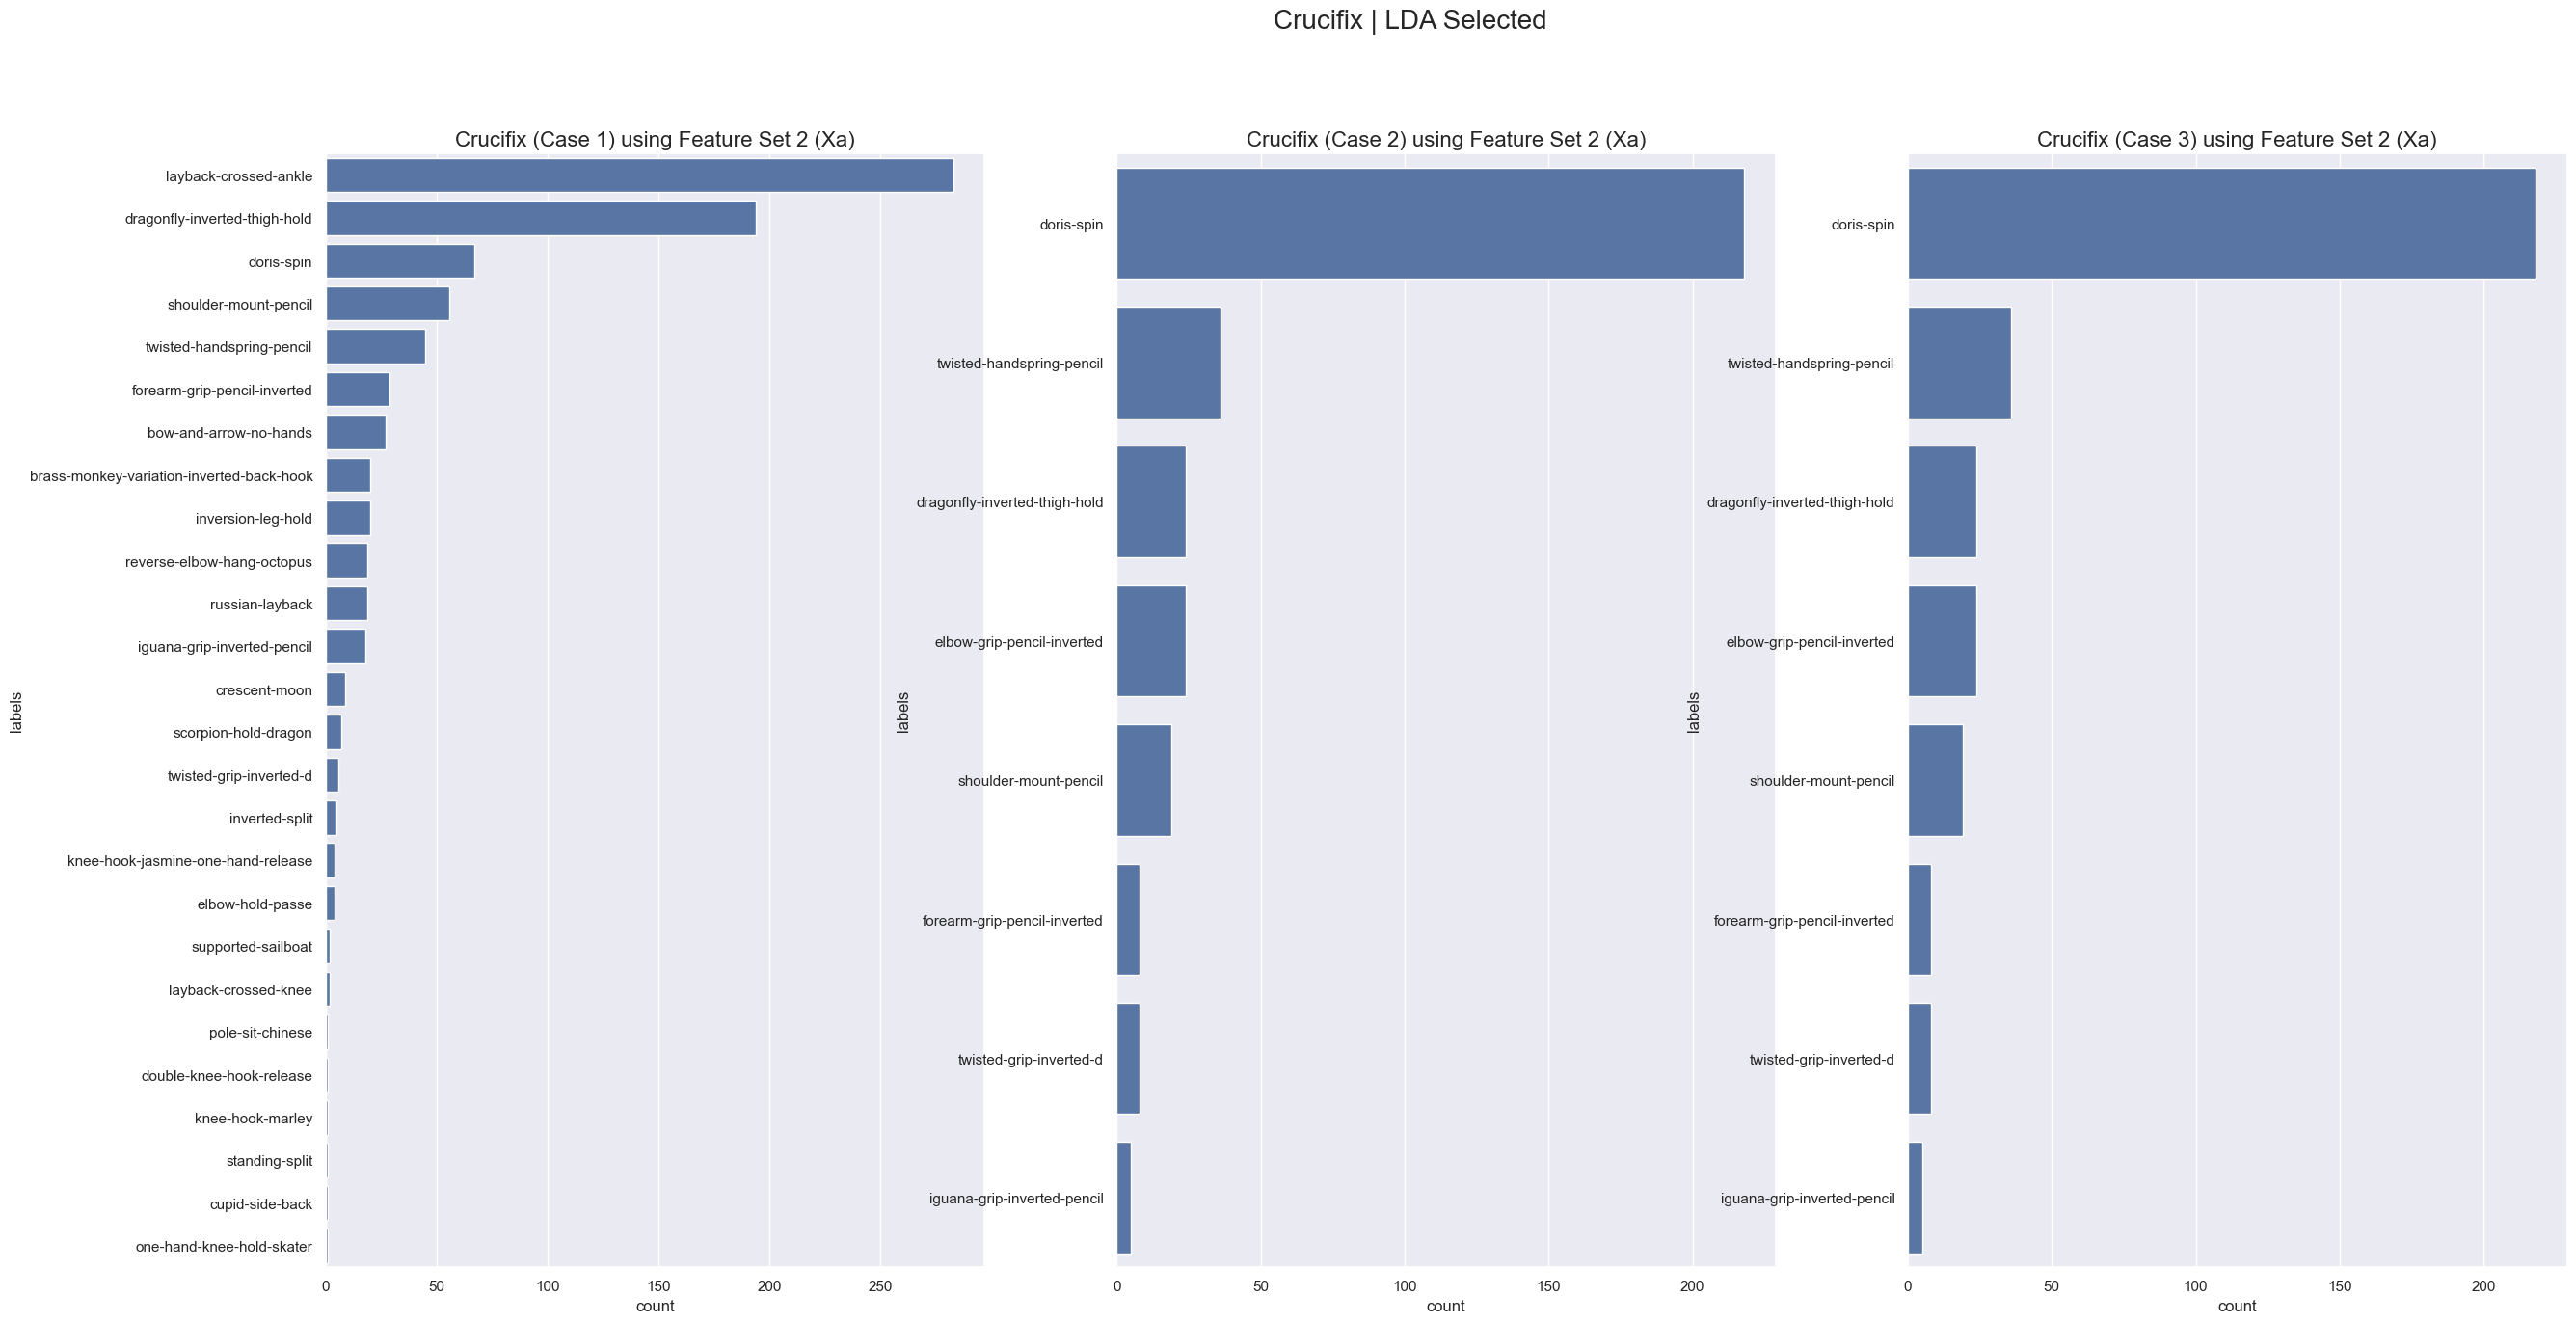

In [78]:
test_category = 'Crucifix'
feature_selection = 'LDA Selected'

# Test Case: Xt4
Xa_y_pred1 = Xa_lda_knn.predict(Xt4[Xa_important_features])
Xa_y_pred1_df = pd.DataFrame(Xa_y_pred1, columns=['labels'])

# Test Case: Xt5
Xa_y_pred2 = Xa_lda_knn.predict(Xt5[Xa_important_features])
Xa_y_pred2_df = pd.DataFrame(Xa_y_pred2, columns=['labels'])

# Test Case: Xt6
Xa_y_pred3 = Xa_lda_knn.predict(Xt6[Xa_important_features])
Xa_y_pred3_df = pd.DataFrame(Xa_y_pred3, columns=['labels'])

fig, axs = plt.subplots(1, 3, figsize=(30, 15))
fig.suptitle(f'{test_category} | {feature_selection}', fontsize=20)

axs[0].set_title(f'{test_category} (Case 1) using Feature Set 2 (Xa)', fontsize=16)
axs[1].set_title(f'{test_category} (Case 2) using Feature Set 2 (Xa)', fontsize=16)
axs[2].set_title(f'{test_category} (Case 3) using Feature Set 2 (Xa)', fontsize=16)

sns.countplot(data=Xa_y_pred1_df, y='labels', order=Xa_y_pred1_df['labels'].value_counts().index, ax=axs[0])
sns.countplot(data=Xa_y_pred2_df, y='labels', order=Xa_y_pred2_df['labels'].value_counts().index, ax=axs[1])
sns.countplot(data=Xa_y_pred3_df, y='labels', order=Xa_y_pred3_df['labels'].value_counts().index, ax=axs[2])

fig.savefig("trial2_results_lda_knn_crucifx.png",dpi=150)

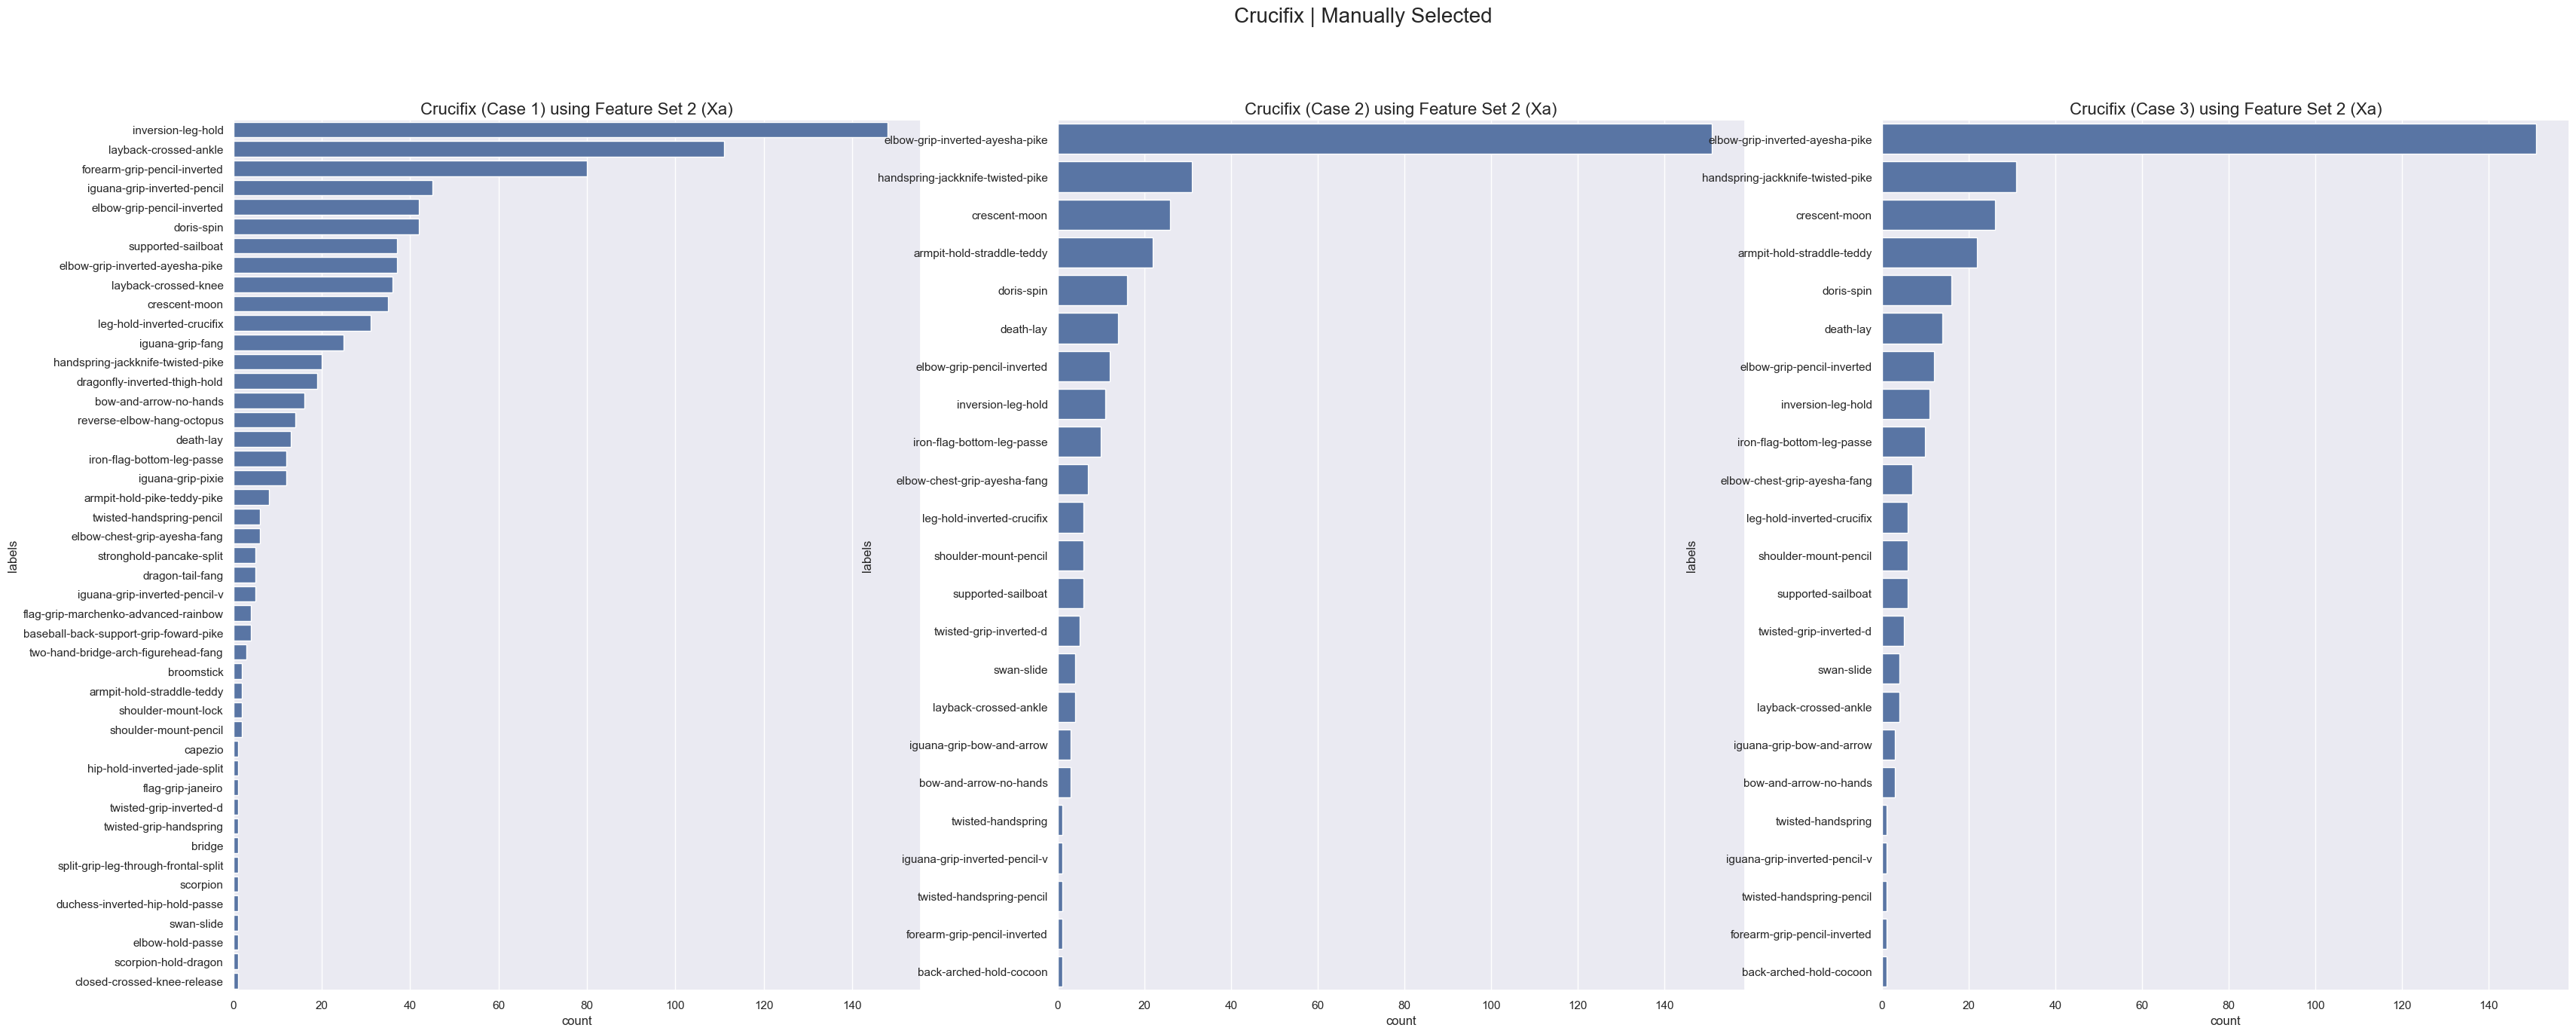

In [79]:
feature_selection = 'Manually Selected'

# Test Case: Xt4
Xa_y_pred1 = Xa_manual_knn.predict(Xt4[Xa_manual_features])
Xa_y_pred1_df = pd.DataFrame(Xa_y_pred1, columns=['labels'])

# Test Case: Xt5
Xa_y_pred2 = Xa_manual_knn.predict(Xt5[Xa_manual_features])
Xa_y_pred2_df = pd.DataFrame(Xa_y_pred2, columns=['labels'])

# Test Case: Xt6
Xa_y_pred3 = Xa_manual_knn.predict(Xt6[Xa_manual_features])
Xa_y_pred3_df = pd.DataFrame(Xa_y_pred3, columns=['labels'])

fig, axs = plt.subplots(1, 3, figsize=(40, 15))
fig.suptitle(f'{test_category} | {feature_selection}', fontsize=20)

axs[0].set_title(f'{test_category} (Case 1) using Feature Set 2 (Xa)', fontsize=16)
axs[1].set_title(f'{test_category} (Case 2) using Feature Set 2 (Xa)', fontsize=16)
axs[2].set_title(f'{test_category} (Case 3) using Feature Set 2 (Xa)', fontsize=16)

sns.countplot(data=Xa_y_pred1_df, y='labels', order=Xa_y_pred1_df['labels'].value_counts().index, ax=axs[0])
sns.countplot(data=Xa_y_pred2_df, y='labels', order=Xa_y_pred2_df['labels'].value_counts().index, ax=axs[1])
sns.countplot(data=Xa_y_pred3_df, y='labels', order=Xa_y_pred3_df['labels'].value_counts().index, ax=axs[2])

plt.savefig("trial2_results_manual_knn_crucifix",dpi=150)

**Test Category: Fireman**

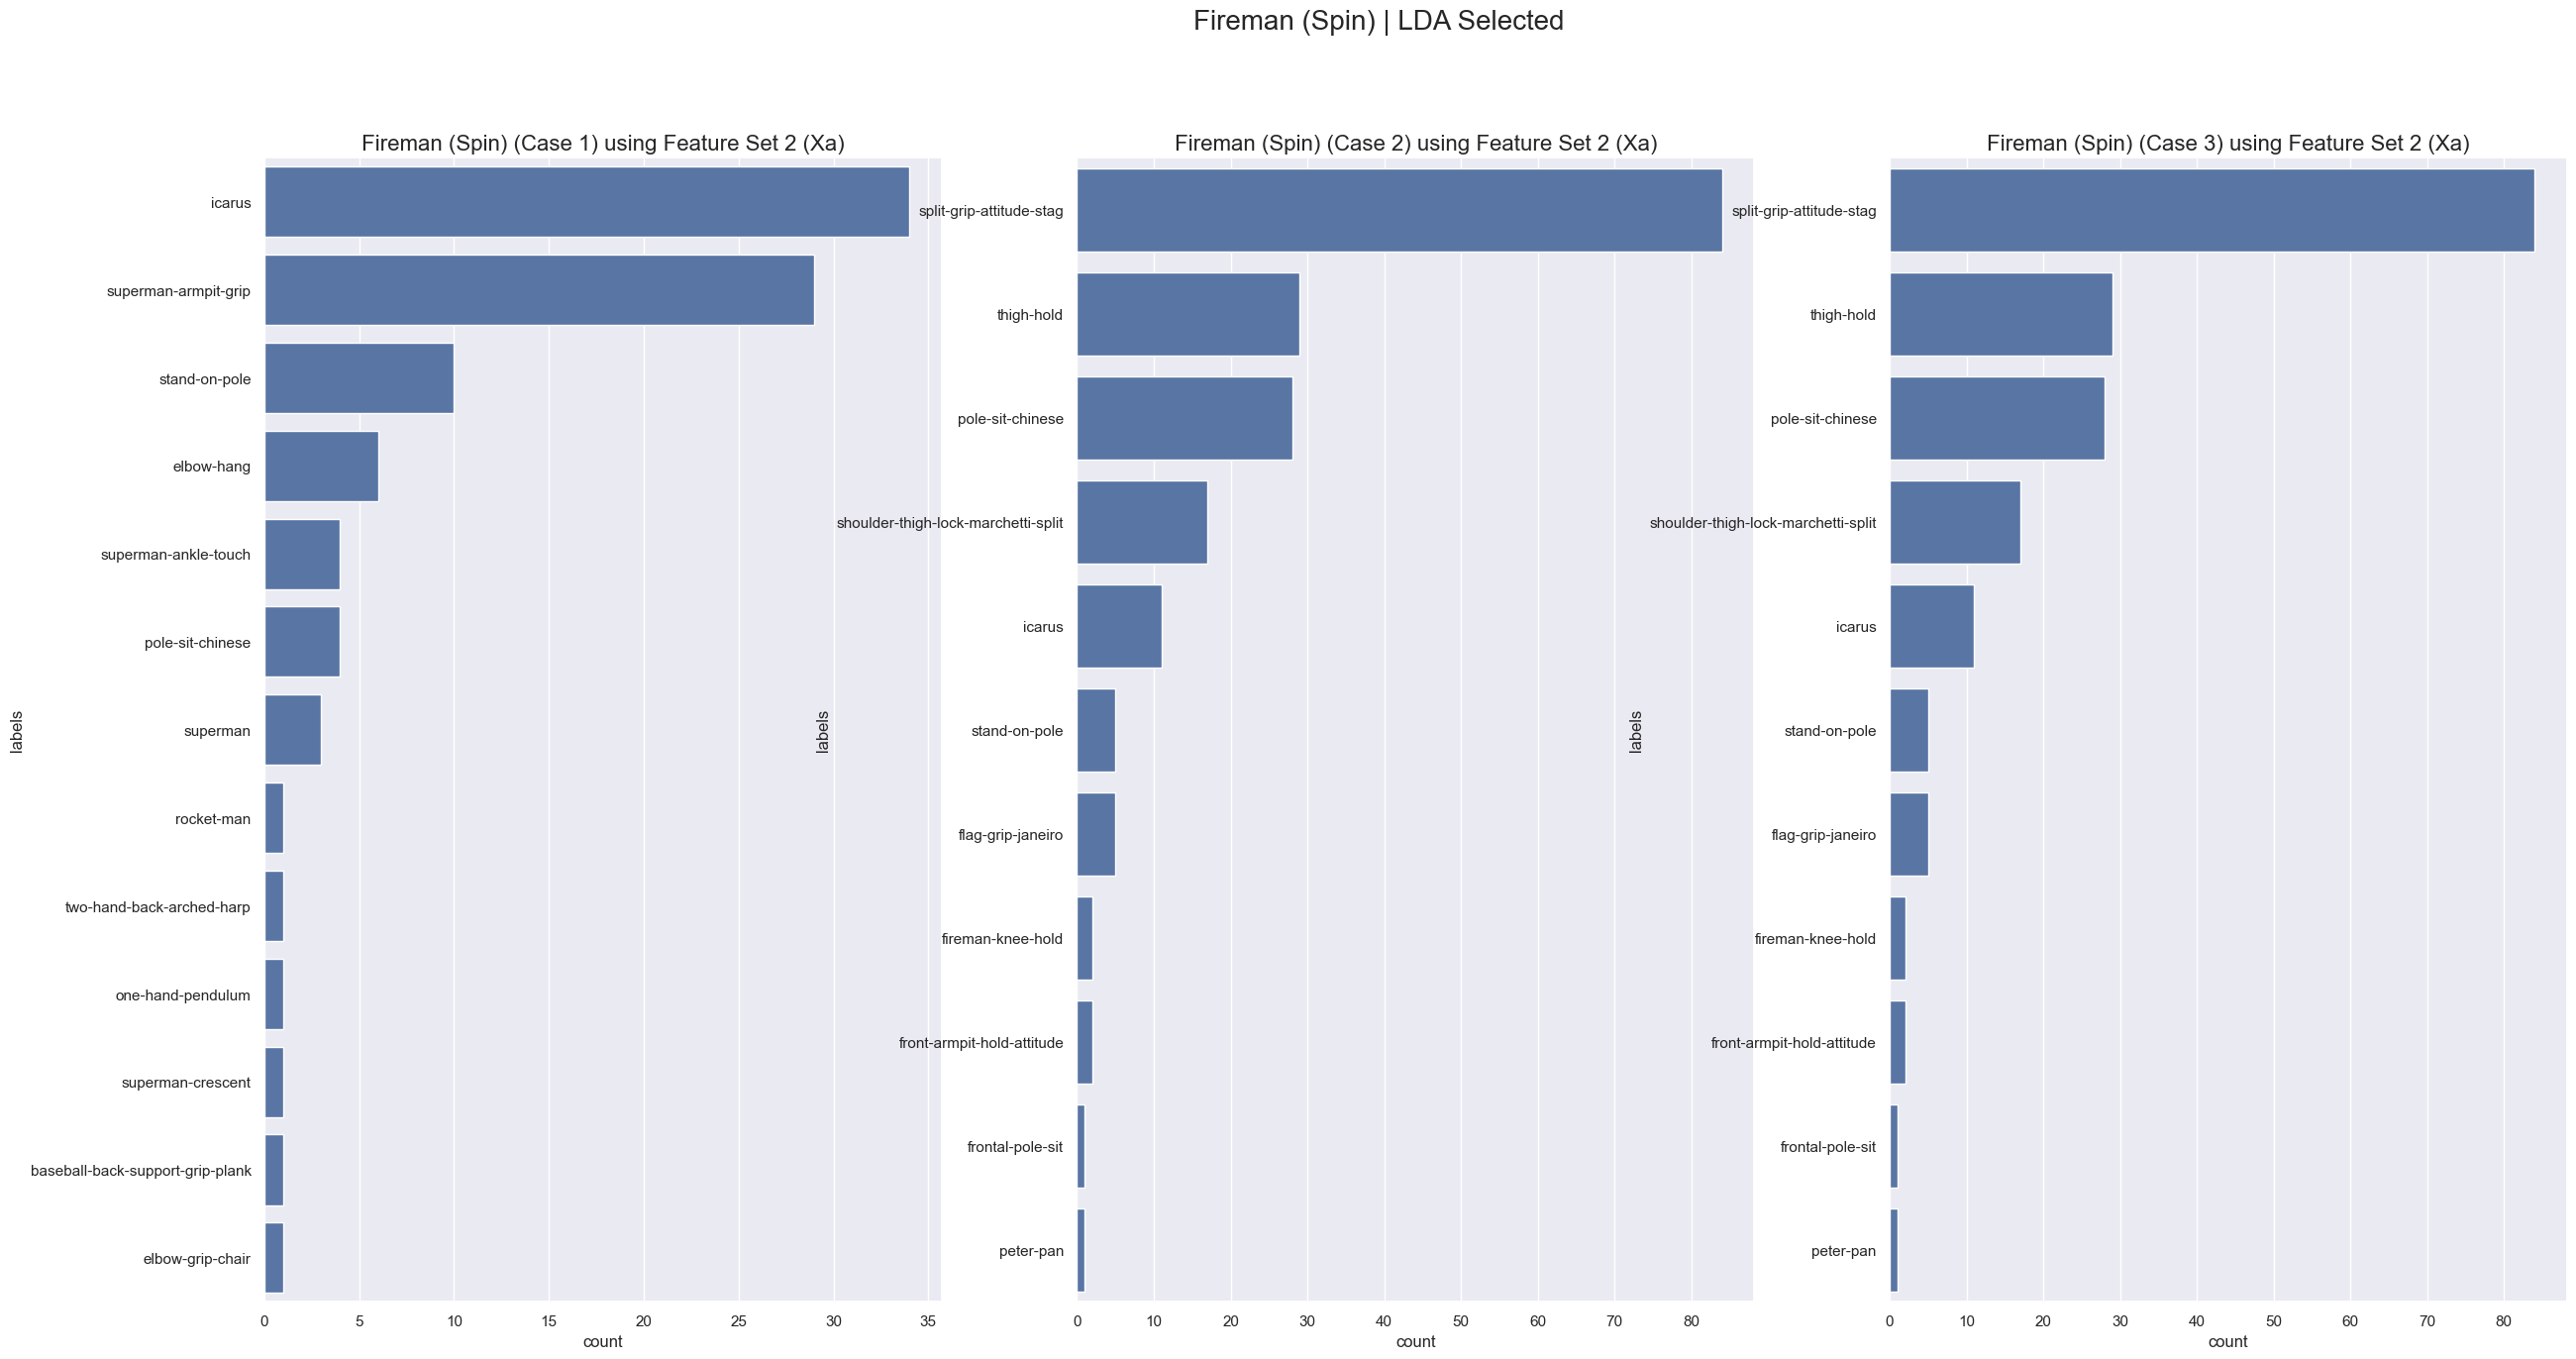

In [80]:
test_category = 'Fireman (Spin)'
feature_selection = 'LDA Selected'

# Test Case: Xt7
Xa_y_pred1 = Xa_lda_knn.predict(Xt7[Xa_important_features])
Xa_y_pred1_df = pd.DataFrame(Xa_y_pred1, columns=['labels'])

# Test Case: Xt8
Xa_y_pred2 = Xa_lda_knn.predict(Xt8[Xa_important_features])
Xa_y_pred2_df = pd.DataFrame(Xa_y_pred2, columns=['labels'])

# Test Case: Xt9
Xa_y_pred3 = Xa_lda_knn.predict(Xt9[Xa_important_features])
Xa_y_pred3_df = pd.DataFrame(Xa_y_pred3, columns=['labels'])

fig, axs = plt.subplots(1, 3, figsize=(30, 15))
fig.suptitle(f'{test_category} | {feature_selection}', fontsize=20)

axs[0].set_title(f'{test_category} (Case 1) using Feature Set 2 (Xa)', fontsize=16)
axs[1].set_title(f'{test_category} (Case 2) using Feature Set 2 (Xa)', fontsize=16)
axs[2].set_title(f'{test_category} (Case 3) using Feature Set 2 (Xa)', fontsize=16)

sns.countplot(data=Xa_y_pred1_df, y='labels', order=Xa_y_pred1_df['labels'].value_counts().index, ax=axs[0])
sns.countplot(data=Xa_y_pred2_df, y='labels', order=Xa_y_pred2_df['labels'].value_counts().index, ax=axs[1])
sns.countplot(data=Xa_y_pred3_df, y='labels', order=Xa_y_pred3_df['labels'].value_counts().index, ax=axs[2])

fig.savefig("trial2_knn_fireman_lda.png",dpi=150)

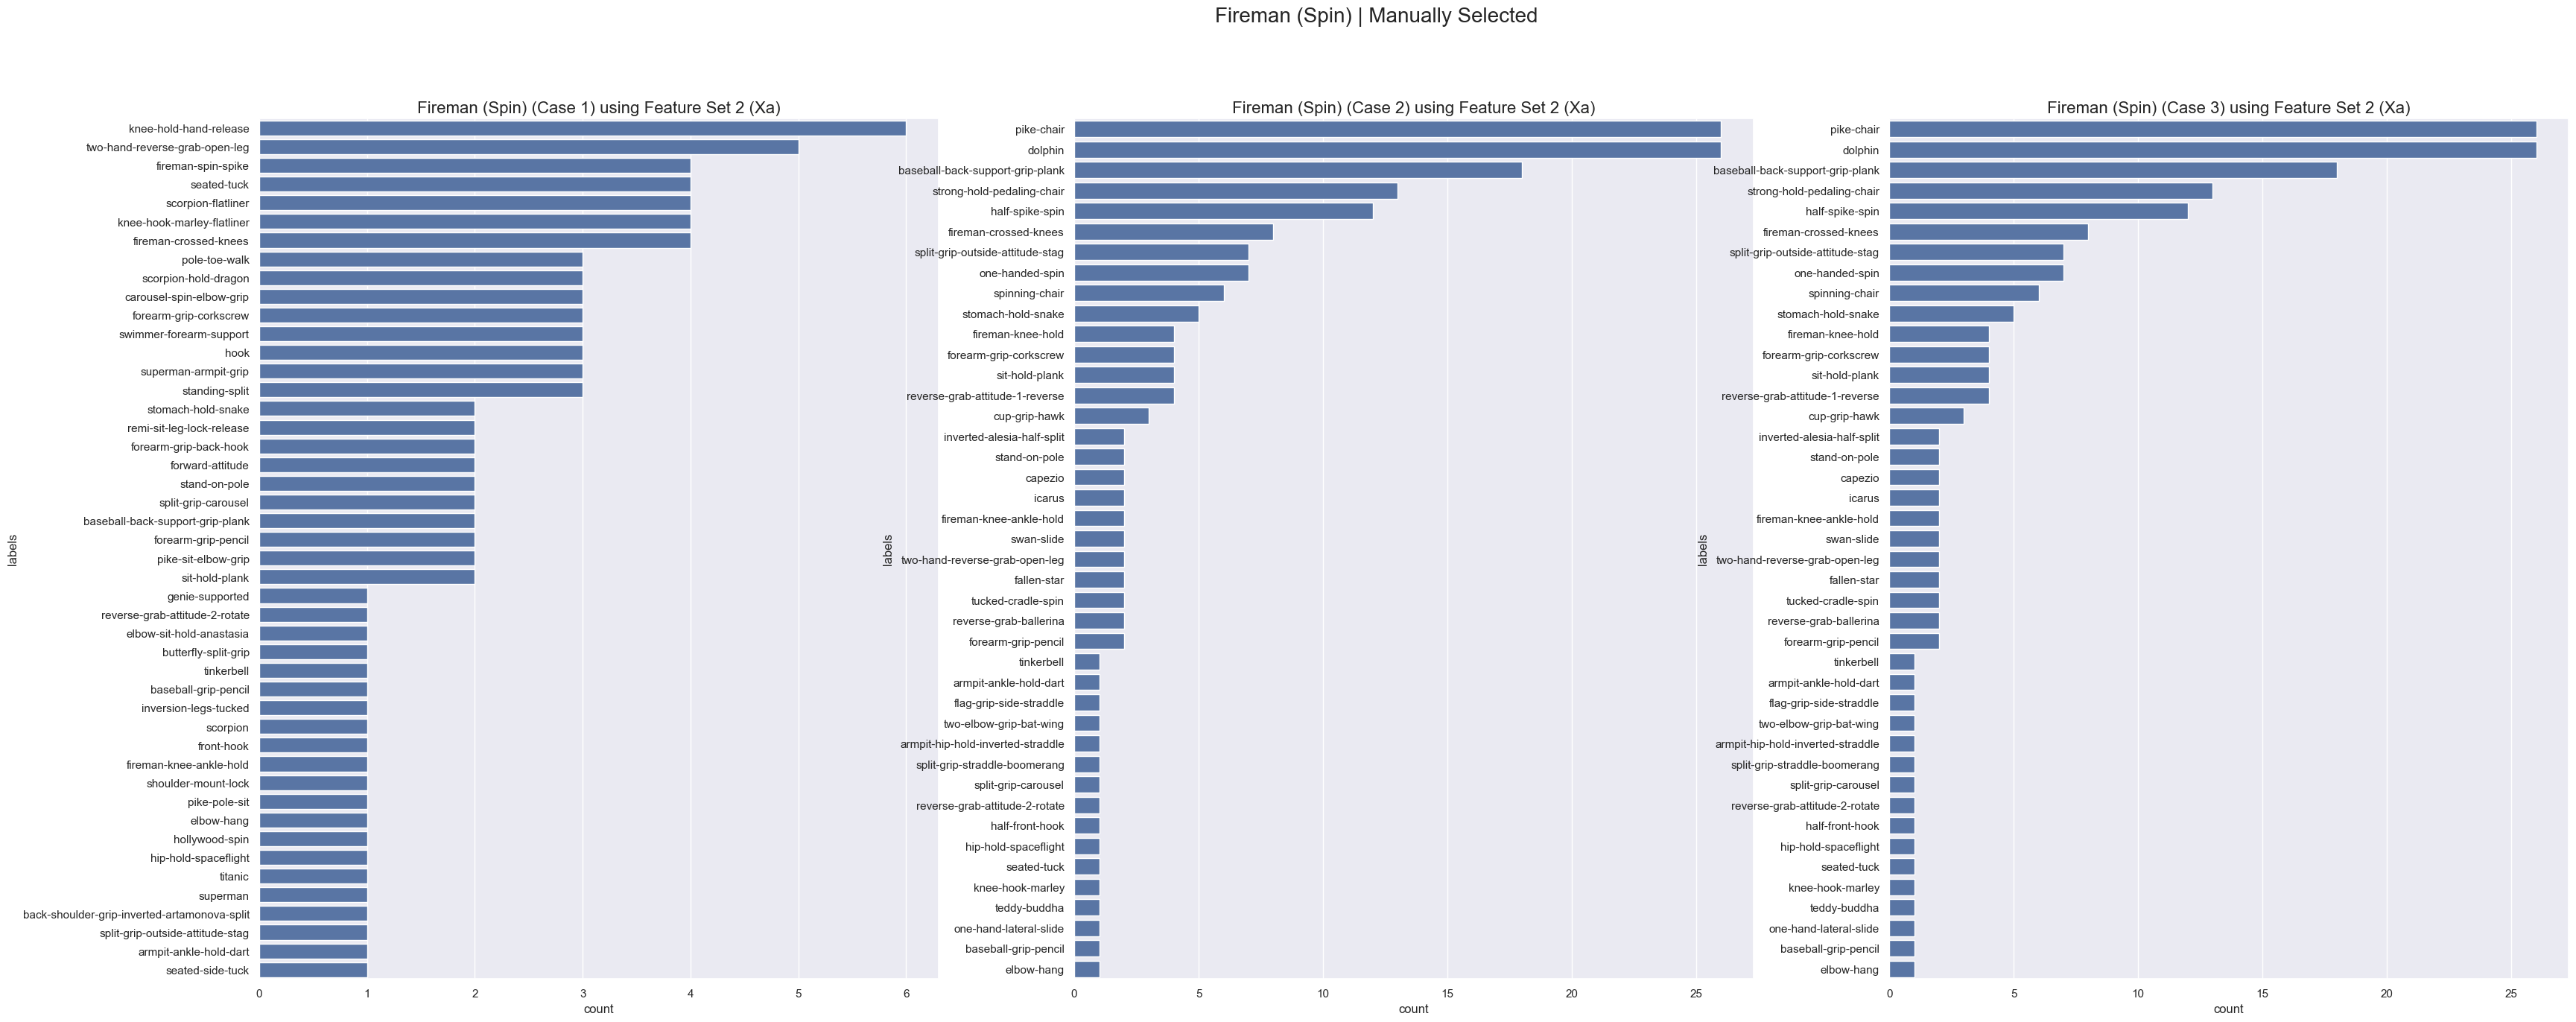

In [81]:
feature_selection = 'Manually Selected'

# Test Case: Xt7
Xa_y_pred1 = Xa_manual_knn.predict(Xt7[Xa_manual_features])
Xa_y_pred1_df = pd.DataFrame(Xa_y_pred1, columns=['labels'])

# Test Case: Xt8
Xa_y_pred2 = Xa_manual_knn.predict(Xt8[Xa_manual_features])
Xa_y_pred2_df = pd.DataFrame(Xa_y_pred2, columns=['labels'])

# Test Case: Xt9
Xa_y_pred3 = Xa_manual_knn.predict(Xt9[Xa_manual_features])
Xa_y_pred3_df = pd.DataFrame(Xa_y_pred3, columns=['labels'])

fig, axs = plt.subplots(1, 3, figsize=(40, 15))
fig.suptitle(f'{test_category} | {feature_selection}', fontsize=20)

axs[0].set_title(f'{test_category} (Case 1) using Feature Set 2 (Xa)', fontsize=16)
axs[1].set_title(f'{test_category} (Case 2) using Feature Set 2 (Xa)', fontsize=16)
axs[2].set_title(f'{test_category} (Case 3) using Feature Set 2 (Xa)', fontsize=16)

sns.countplot(data=Xa_y_pred1_df, y='labels', order=Xa_y_pred1_df['labels'].value_counts().index, ax=axs[0])
sns.countplot(data=Xa_y_pred2_df, y='labels', order=Xa_y_pred2_df['labels'].value_counts().index, ax=axs[1])
sns.countplot(data=Xa_y_pred3_df, y='labels', order=Xa_y_pred3_df['labels'].value_counts().index, ax=axs[2])

plt.savefig("trial2_knn_fireman_all.png",dpi=150)